In [1]:
import numpy as np
import pandas as pd
import os.path
import cv2
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import gbvoid_dataset as gbvoid
from modules import void_parameter as void_parameter

In [ ]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

In [8]:
columns_void = ['phi1_right', 'PHI_right', 'phi2_right', 'phi1_left', 'PHI_left', 'phi2_left',
                'misorientation', 'mis_x_right', 'mis_y_right', 'mis_z_right',
                'mis_x_left', 'mis_y_left', 'mis_z_left',
                'Length', 'Trace', 'x_start', 'y_start', 'x_end', 'y_end', 'gbID_right', 'gbID_left', 'Sigma',
                'Distance_Center',
                'Void_id', 'x_junction', 'y_junction', 'Rebuild_len', 'Junction','Prox_par', 'Void', 'Void_Parameter']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
    
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

void_dataset = void_dataset.apply(pd.to_numeric) # convert all columns of DataFrame
#pd.to_numeric(void_dataset['Length','misorientation']) 
print(void_dataset.shape)
void_dataset.head()

(3934, 31)


,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,misorientation,mis_x_right,mis_y_right,mis_z_right,...,Sigma,Distance_Center,Void_id,x_junction,y_junction,Rebuild_len,Junction,Prox_par,Void,Void_Parameter
0,0.180,0.250,6.179,5.039,0.678,1.946,55.90,5.0,11.0,-12.0,...,0.0,811.319262,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,0.180,0.250,6.179,6.066,0.356,0.319,9.33,-14.0,20.0,-7.0,...,0.0,806.443713,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,3.511,0.204,2.663,6.066,0.356,0.319,32.61,-26.0,0.0,-9.0,...,0.0,794.650128,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,3.315,0.286,2.941,3.511,0.204,2.663,7.38,-21.0,4.0,20.0,...,0.0,778.051543,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,0.204,0.220,6.190,2.959,0.506,3.541,41.18,17.0,-4.0,-2.0,...,0.0,763.117018,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


In [9]:
# Drop negative Void Parameter
print(void_dataset.shape)
void_dataset=void_dataset.loc[void_dataset['Void_Parameter'] != -1.0]
print(void_dataset.shape)

(3934, 31)
(3908, 31)


In [10]:
drop_col=['phi1_right', 'PHI_right', 'phi2_right', 'phi1_left', 'PHI_left',
       'phi2_left', 'mis_x_right', 'mis_y_right',
       'mis_z_right', 'mis_x_left', 'mis_y_left', 'mis_z_left',
       'x_start', 'y_start', 'x_end', 'y_end', 'gbID_right',
       'gbID_left','x_junction','y_junction']
void_dataset=void_dataset.drop(drop_col, axis=1)

In [11]:
void_dataset.isnull().sum()
#void_dataset['Junction'] = void_dataset['Junction'].fillna(0)

misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Rebuild_len        0
Junction           0
Prox_par           0
Void               0
Void_Parameter     0
dtype: int64

In [105]:
# Divide into two dataframe, void gb and no void gb
selected_df=void_dataset.loc[void_dataset['Void_Parameter'] != 0.0]
novoid_df=void_dataset.loc[void_dataset['Void_Parameter'] == 0.0]
print(selected_df.shape)
print(novoid_df.shape)
print('Selected gb percentage:')
print((selected_df.shape[0]/void_dataset.shape[0])*100)

#void_dataset[void_dataset["Void"] != 1]

(65, 10)
(4954, 10)
Selected gb percentage:
1.2950787009364415


In [57]:
void_dataset.isnull().sum()
void_dataset['Junction'] = void_dataset['Junction'].fillna(0)

In [69]:
selected_df.isnull().sum()

misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Pred_lenght        0
Junction           3
Void               0
Void_Parameter     0
dtype: int64

In [106]:
selected_df.dtypes

misorientation     float64
Length             float64
Trace              float64
Sigma              float64
Distance_Center    float64
Void_id            float64
Pred_lenght        float64
Junction           float64
Void                 int64
Void_Parameter     float64
dtype: object

In [92]:
void_dataset['misorientation'] = void_dataset['misorientation'].astype(float)
void_dataset['misorientation'].mean()

39.248730822873085

In [107]:
grouped_df = selected_df.groupby("Void_id").mean()

grouped_df.head()

,misorientation,Length,Trace,Sigma,Distance_Center,Pred_lenght,Junction,Void,Void_Parameter
Void_id,,,,,,,,,
0.0,25.500,11.719000,140.200000,5.898300,13.898127,-1.000000,0.000000,1,1.000000
1.0,25.500,24.012000,14.700000,5.563350,2.068085,-1.000000,0.000000,1,1.000000
2.0,44.690,8.301333,112.966667,5.740267,12.701284,4.128865,1.333333,1,0.966667
3.0,32.820,29.462000,169.800000,5.614370,3.726280,-1.000000,0.000000,1,1.000000
4.0,26.655,12.081000,110.650000,5.022140,7.946976,-1.000000,0.000000,1,1.000000


In [75]:
df_voids=selected_df.groupby('Void_id').mean()
df_voids

,Junction,Void_Parameter
Void_id,,
0.0,0.000000,1.000000
1.0,0.000000,1.000000
2.0,1.333333,0.966667
3.0,0.000000,1.000000
4.0,0.000000,1.000000
5.0,0.000000,1.000000
7.0,1.333333,1.000000
8.0,2.000000,1.000000
13.0,0.000000,1.000000


In [22]:
miso=df_voids['misorientation'].tolist()
print(miso)

[40.4275, 55.19, 53.015, 31.253000000000004, 18.75, 34.45, 36.279999999999994]


In [14]:
#df_close_void=selected_df.groupby(['Void_id']).min(selected_df['Distance_Center'])

df_close_void=selected_df.loc[selected_df.groupby('Void_id')['Distance_Center'].idxmin()]

df_close_void


,misorientation,Length,Trace,Sigma,Distance_Center,Void_id,Pred_lenght,Junction,Void,Void_Parameter
2647,40.25,12.490,76.1,5.87344,8.252113,0.0,0.000000,3.0,1.0,1.0
2017,55.19,28.095,175.3,5.16563,11.443416,1.0,-1.000000,0.0,1.0,1.0
305,54.94,18.583,23.8,5.88660,14.215933,2.0,-1.000000,0.0,1.0,1.0
3345,8.56,9.018,116.3,5.89797,15.978424,4.0,0.000000,2.0,1.0,1.0
2473,18.75,27.495,169.1,5.10259,6.551258,5.0,-1.000000,0.0,1.0,1.0
3696,48.36,17.776,43.0,5.90310,5.112305,7.0,0.822715,2.0,1.0,1.0
2874,25.74,43.189,54.6,4.60860,18.424180,8.0,-1.000000,0.0,1.0,1.0


In [116]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'misorientation','mis_x_right','mis_y_right', 'mis_z_right',
         'mis_x_left','mis_y_left','mis_z_left',
         'Length','Trace', 'x_start', 'y_start', 'x_end','y_end','gbID_right', 'gbID_left', 'Sigma','Distance_Center',
              'Void_id','x_junction','y_junction','Pred_lenght','Junction','Void','Void_Parameter']

drop_col=['phi1_right', 'PHI_right', 'phi2_right', 'phi1_left', 'PHI_left',
       'phi2_left', 'mis_x_right', 'mis_y_right',
       'mis_z_right', 'mis_x_left', 'mis_y_left', 'mis_z_left',
       'x_start', 'y_start', 'x_end', 'y_end', 'gbID_right',
       'gbID_left','x_junction','y_junction']

# Collect all txt data
miso_mean=[]
miso_close=[]
length_mean=[]
length_close=[]
trace_mean=[]
trace_close=[]
sigma_mean=[]
sigma_close=[]
junc_mean=[]
junc_close=[]

for name in inputs:
    print('--',name,'--')
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    
    #void_dataset=pd.concat(data, ignore_index='True')
    void_dataset_temp.columns=columns_void
    void_dataset_temp = void_dataset_temp.apply(pd.to_numeric) 
    print(void_dataset_temp.shape)
    void_dataset_temp=void_dataset_temp.loc[void_dataset_temp['Void_Parameter'] != -1.0]
    print(void_dataset_temp.shape)
    
    # Drop negative Void Parameter
    void_dataset_temp=void_dataset_temp.drop(drop_col, axis=1)
    print(void_dataset_temp.shape)
    
    nu=void_dataset_temp.isnull().sum()
    nu_list=nu.tolist()
    res=any(elem >0 for elem in nu_list)
    if res:
        print(nu)
        void_dataset_temp['Junction'] = void_dataset_temp['Junction'].fillna(0)

    # Divide into two dataframe, void gb and no void gb
    selected_df_temp=void_dataset_temp.loc[void_dataset_temp['Void_Parameter'] != 0.0]
    novoid_df_temp=void_dataset_temp.loc[void_dataset_temp['Void_Parameter'] == 0.0]
    
    # Group by void id and mean values
    df_voids_temp=selected_df_temp.groupby(['Void_id']).mean()
    # Group by void id and the closest gb to the void values
    df_close_void_temp=selected_df_temp.loc[selected_df_temp.groupby('Void_id')['Distance_Center'].idxmin()]    
    
    # Save group DataSet
    fileout_mean='/home/estanislao/Documents/ML_GB/GrainLearning/output/Dataframes/'+str(name)+'_mean'+'.csv'
    fileout_close='/home/estanislao/Documents/ML_GB/GrainLearning/output/Dataframes/'+str(name)+'_close'+'.csv'

    df_voids_temp.to_csv(fileout_mean, header=True)
    df_close_void_temp.to_csv(fileout_close, header=True)

    # Keep values as list
    miso_mean_temp=df_voids_temp['misorientation'].tolist()
    miso_close_temp=df_close_void_temp['misorientation'].tolist()
    miso_mean=miso_mean+miso_mean_temp
    miso_close=miso_close+miso_close_temp

    #miso_mean.append(miso_mean_temp)
    #miso_close.append(miso_close_temp)
    
    length_mean_temp=df_voids_temp['Length'].tolist()
    length_close_temp=df_close_void_temp['Length'].tolist()
    length_mean=length_mean+length_mean_temp
    length_close=length_close+length_close_temp
    
    trace_mean_temp=df_voids_temp['Trace'].tolist()
    trace_close_temp=df_close_void_temp['Trace'].tolist()
    trace_mean=trace_mean+trace_mean_temp
    trace_close=trace_close+trace_close_temp
    #trace_mean.append(trace_mean_temp)
    #trace_close.append(trace_close_temp)
    
    sigma_mean_temp=df_voids_temp['Sigma'].tolist()
    sigma_close_temp=df_close_void_temp['Sigma'].tolist()
    sigma_mean=sigma_mean+sigma_mean_temp
    sigma_close=sigma_close+sigma_close_temp
    #sigma_mean.append(sigma_mean_temp)
    #sigma_close.append(sigma_close_temp)
    
    junc_mean_temp=df_voids_temp['Junction'].tolist()
    junc_close_temp=df_close_void_temp['Junction'].tolist()
    junc_mean=junc_mean+junc_mean_temp
    junc_close=junc_close+junc_close_temp
    #junc_mean.append(junc_mean_temp)
    #junc_close.append(junc_close_temp)

-- 1_001 --
(3934, 30)
(3849, 30)
(3849, 10)
-- 1_002 --
(5600, 30)
(5452, 30)
(5452, 10)
-- 1_003 --
(5363, 30)
(5074, 30)
(5074, 10)
-- 1_004 --
(5167, 30)
(5019, 30)
(5019, 10)
misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Pred_lenght        0
Junction           3
Void               0
Void_Parameter     0
dtype: int64
-- 1_005 --
(7345, 30)
(7165, 30)
(7165, 10)
misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Pred_lenght        0
Junction           2
Void               0
Void_Parameter     0
dtype: int64
-- 1_006 --
(6754, 30)
(6555, 30)
(6555, 10)
misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Pred_lenght        0
Junction           5
Void               0
Void_Parameter     0
dtype: int64
-- 1_007 --
(6628, 30)
(6411, 30)
(6411, 10)
-- 1_008 --
(530

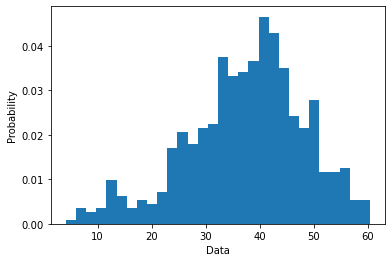

In [115]:
plt.hist(miso_mean, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

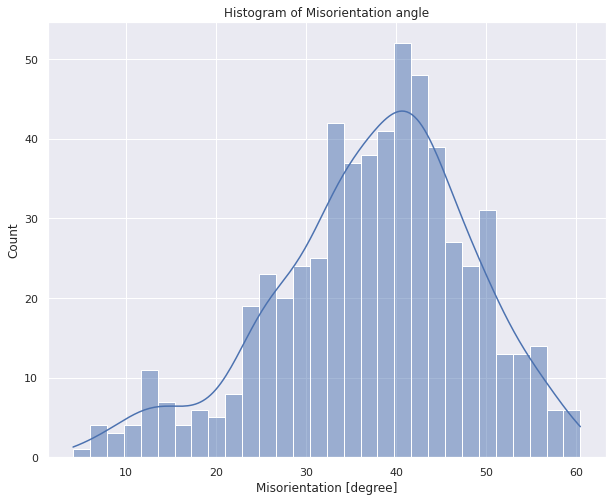

In [167]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(miso_mean, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('Misorientation [degree]')
ax.set_title("Histogram of Misorientation angle")
plt.savefig('save_as_a_png.png',bbox_inches='tight')

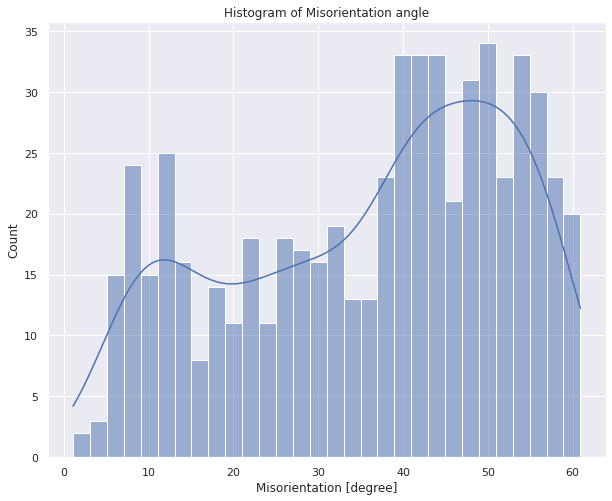

In [168]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(miso_close, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('Misorientation [degree]')
ax.set_title("Histogram of Misorientation angle")
plt.savefig('save_as_a_png.png',bbox_inches='tight')

In [172]:
from scipy import stats
stats.describe(miso_close)

DescribeResult(nobs=595, minmax=(1.1, 60.9), mean=36.19426890756302, variance=264.512866930934, skewness=-0.4076124627006636, kurtosis=-1.0614944895162903)

Text(0.5, 1.0, 'Histogram of gb length')

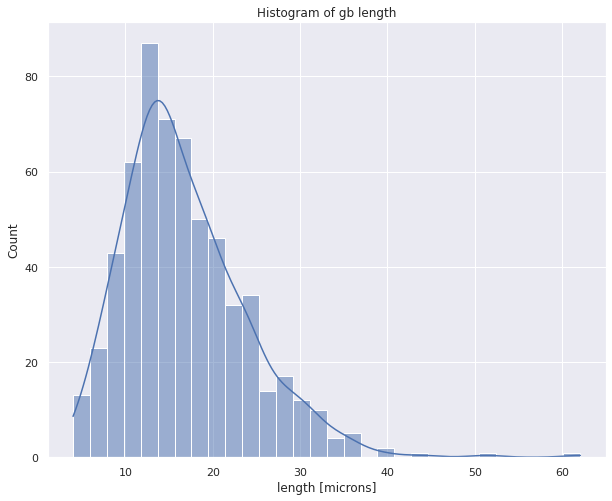

In [155]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(length_mean, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('length [microns]')
ax.set_title("Histogram of gb length")

Text(0.5, 1.0, 'Histogram of gb length')

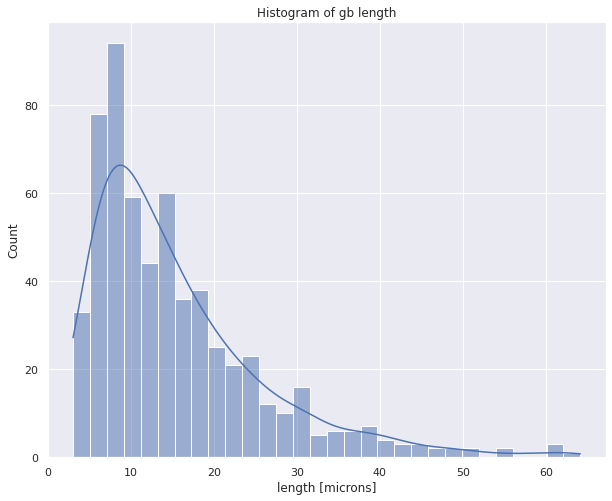

In [156]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(length_close, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('length [microns]')
ax.set_title("Histogram of gb length")

Text(0.5, 1.0, 'Histogram of Trace angle')

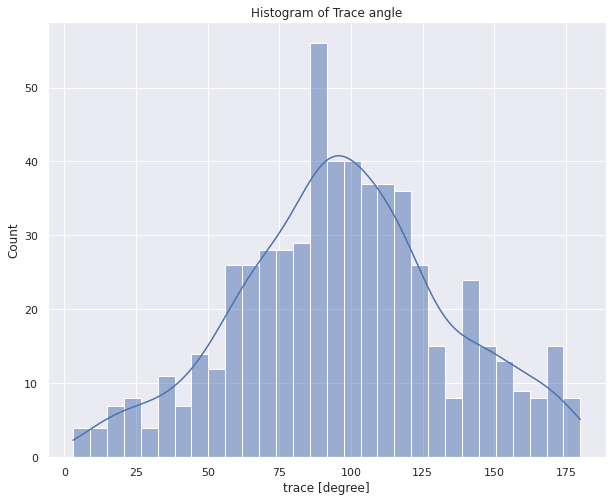

In [157]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(trace_mean, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('trace [degree]')
ax.set_title("Histogram of Trace angle")

Text(0.5, 1.0, 'Histogram of Trace angle')

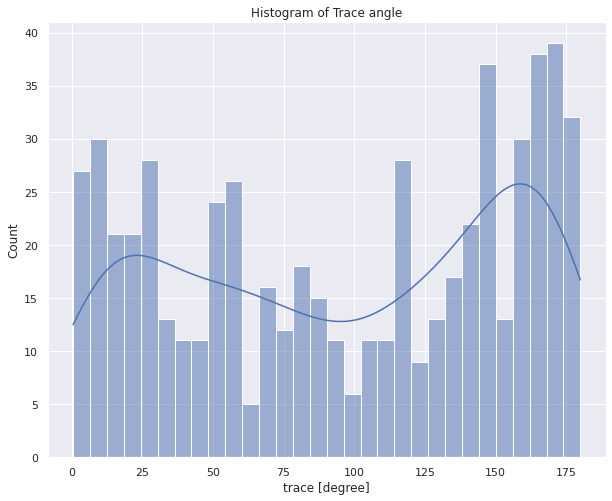

In [159]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(trace_close, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('trace [degree]')
ax.set_title("Histogram of Trace angle")

Text(0.5, 1.0, 'Histogram of CSL')

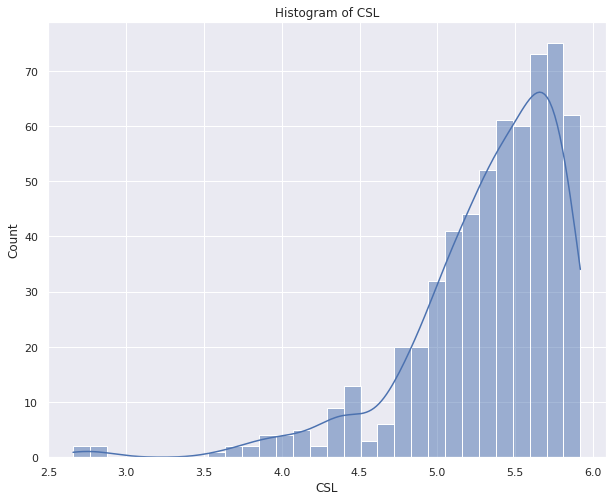

In [173]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(sigma_mean, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('CSL')
ax.set_title("Histogram of CSL")

Text(0.5, 1.0, 'Histogram of CSL')

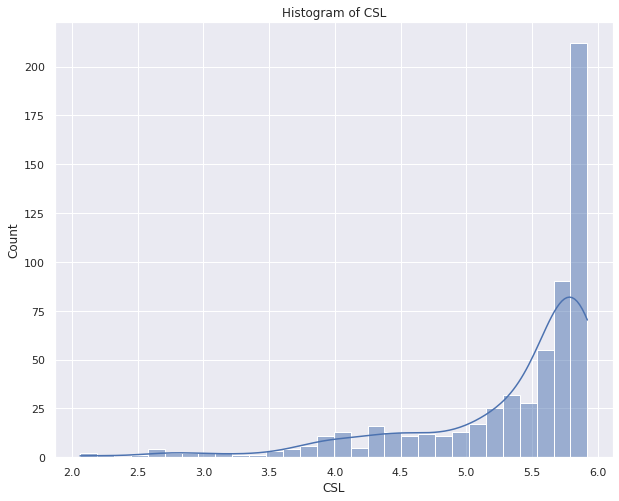

In [174]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(sigma_close, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('CSL')
ax.set_title("Histogram of CSL")

Text(0.5, 1.0, 'Histogram of junction')

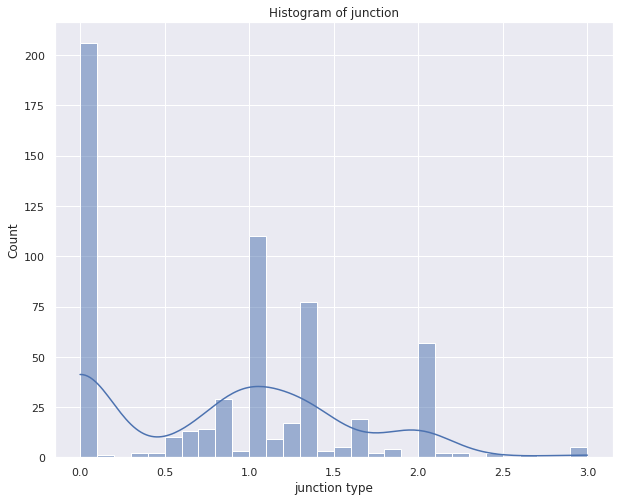

In [176]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(junc_mean, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('junction type')
ax.set_title("Histogram of junction")

Text(0.5, 1.0, 'Histogram of junction')

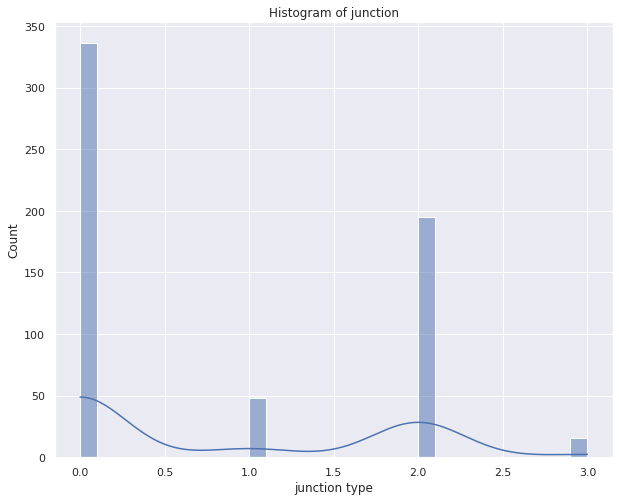

In [177]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style("darkgrid")
ax = sns.histplot(junc_close, bins= 30, kde= True)
ax.set_ylabel('Count')
ax.set_xlabel('junction type')
ax.set_title("Histogram of junction")